In [3]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
# Get the current working directory (should be 'Codes' if running interactively)
current_dir = os.getcwd()
# Navigate up to 'FHN'
fhn_dir = os.path.abspath(os.path.join(current_dir, '..'))
# Change the working directory to 'FHN'
os.chdir(fhn_dir)

import sys
sys.path.insert(1, 'Codes/')
from myUtils import *
PATHL = file_path = os.path.join(fhn_dir, 'Data', 'OUTPUT', 'FPP', 'FPP_{window}_{year}.tif')

# 1. Import shapefile

In [2]:
# Load shapefile and reproject
shapef = os.path.join(fhn_dir, 'Data/SHAPEFILES/world-administrative-boundaries.shp')
gdf = gpd.read_file(shapef)
gdf = gdf.to_crs("ESRI:54009")

# 2. 2020

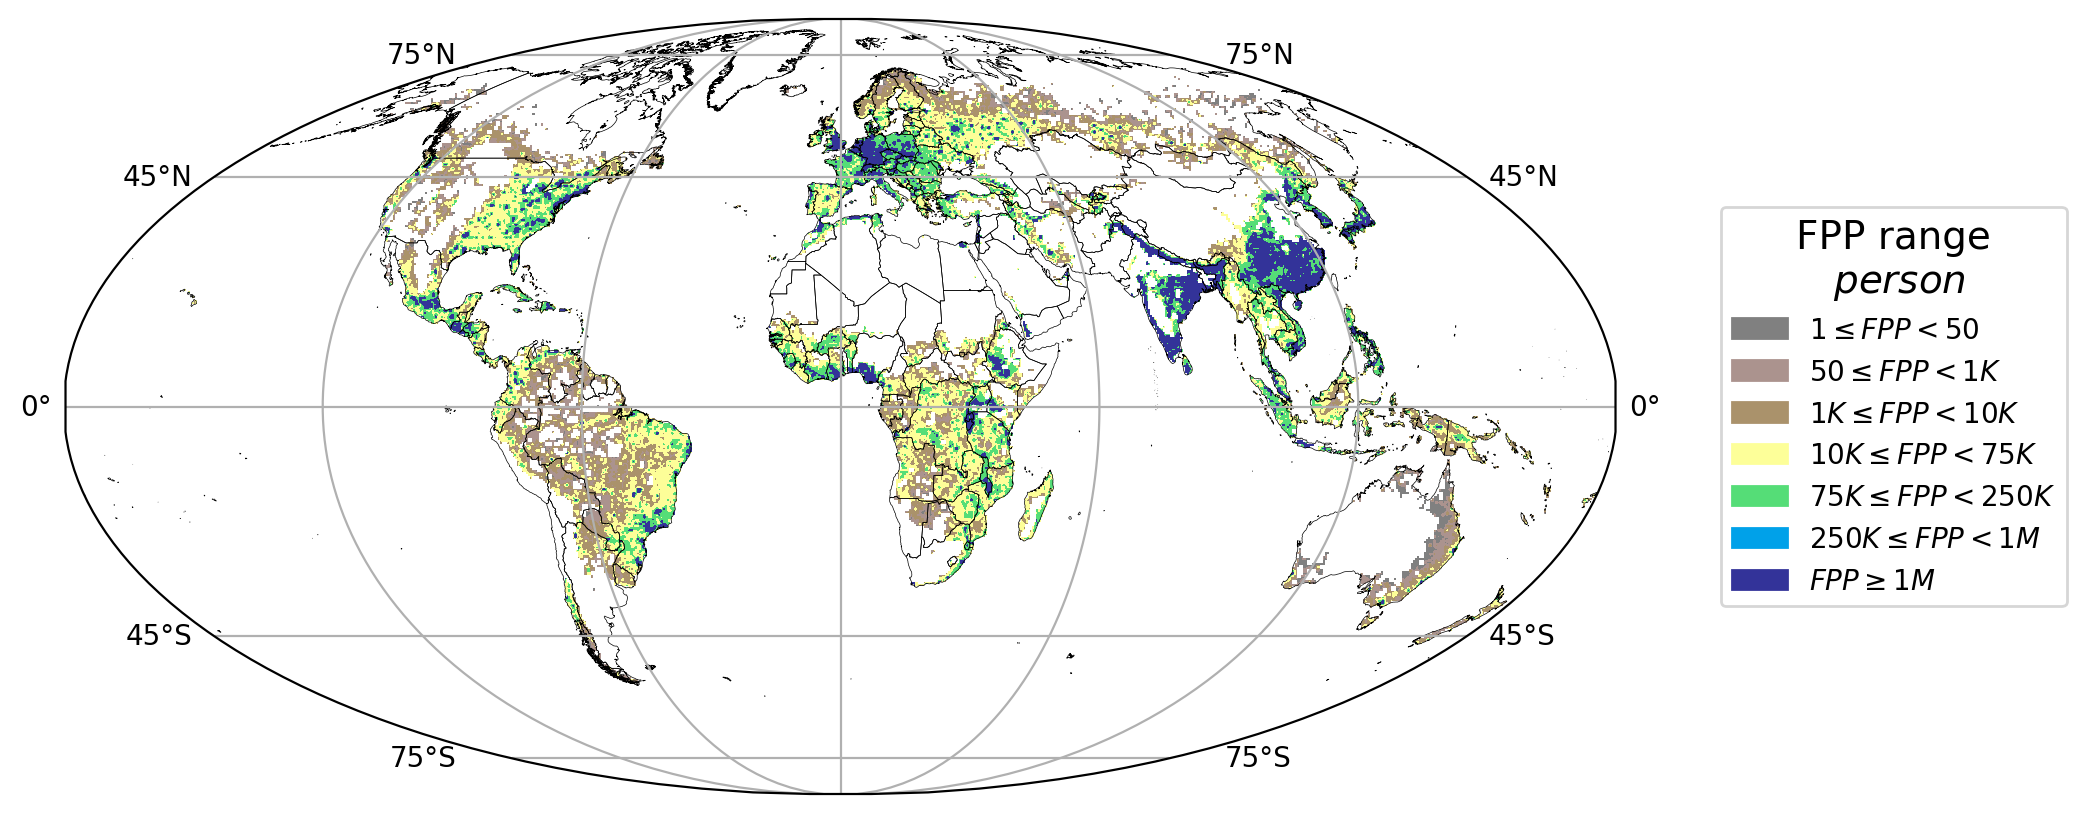

In [28]:
# Figure 2A
window = 50
year = 2020
file_raster_path = PATHL.format(window=window, year=year)

data, src = read_raster(file_raster_path)
quantile_values = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
quantiles = np.nanquantile(data, quantile_values)
# Definecolormap for plotting
values =  [1, 50, 1000, 10000, 75000, 250000, 1000000]

#values = [0, 1, 50, 1e2, 1e3, 1e4, 1e5, 1e6]
#values = [f"{val:.0e}".replace('e+0', r'\times 10^{').replace('e-0', r'\times 10^{-').replace('e+', r'\times 10^{').replace('e-', r'\times 10^{-').rstrip('0').replace('^0', '') + '}' for val in values]


cmap = plt.get_cmap('terrain_r')
n_colors = len(values)
colors = [cmap(i / (n_colors - 1)) for i in range(n_colors)]
colors[0] = 'gray'
cmap, ncolors = ListedColormap(colors), len(colors)
norm = BoundaryNorm(values, ncolors=ncolors, clip=True)


# Plot Figure 1A
fig = plt.figure(figsize=(10, 20))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
gdf.boundary.plot(ax=ax, color='black', lw=.25)
plot_data_maps(ax, data, cmap, norm, src)


values_str = ['1', '50', '1K', '10K', '75K', '250K', '1M']
legend_patches = [Patch(color=colors[i], label=rf'${values_str[i]} \leq FPP < {values_str[i+1]}$') for i in range(n_colors - 1)]
legend_patches.append(Patch(color=colors[-1], label=rf'$FPP \geq {values_str[-1]}$'))
#add_legend(ax, legend_patches, 'FPP range\n ' + r'$person$')
title = 'FPP range\n ' + r'$person$'
legend = ax.legend(handles=legend_patches, 
                   loc='center right', 
                   bbox_to_anchor=(1.3, 0.5), 
                   title=title, title_fontsize=14)
legend.get_title().set_ha('center')

### 2.1 Save Figure 

In [29]:
fout = os.path.join(fhn_dir, 'Figures/Figure2A.tiff')
fig.savefig(fout, dpi=300, bbox_inches = 'tight')

# 3. Relative change

In [94]:
year = 1975
file_raster_path = PATHL.format(window=window, year=year)
data0, src = read_raster(file_raster_path)
dataRelDiff = 100 * (data - data0) / data0

quantiles = np.nanquantile(dataRelDiff, quantile_values)
# Round the quantiles to the nearest integer
rounded_quantiles = np.round(quantiles).astype(int)
rounded_quantiles

array([-100,  -77,  -21,   13,   73,  199,  465, 5819])

In [102]:
values = [-100, -75, -25, 0, 75, 250, 500, 5000]

In [103]:
cmap = plt.get_cmap('gnuplot_r')  # You can change 'Blues' to any other colormap name

# Generate 9 discrete colors from the colormap
n_colors = len(values)
colors = [cmap(i / (n_colors - 1)) for i in range(n_colors)]
cmap = ListedColormap(colors)
norm = BoundaryNorm(values, ncolors=len(colors), clip=True)



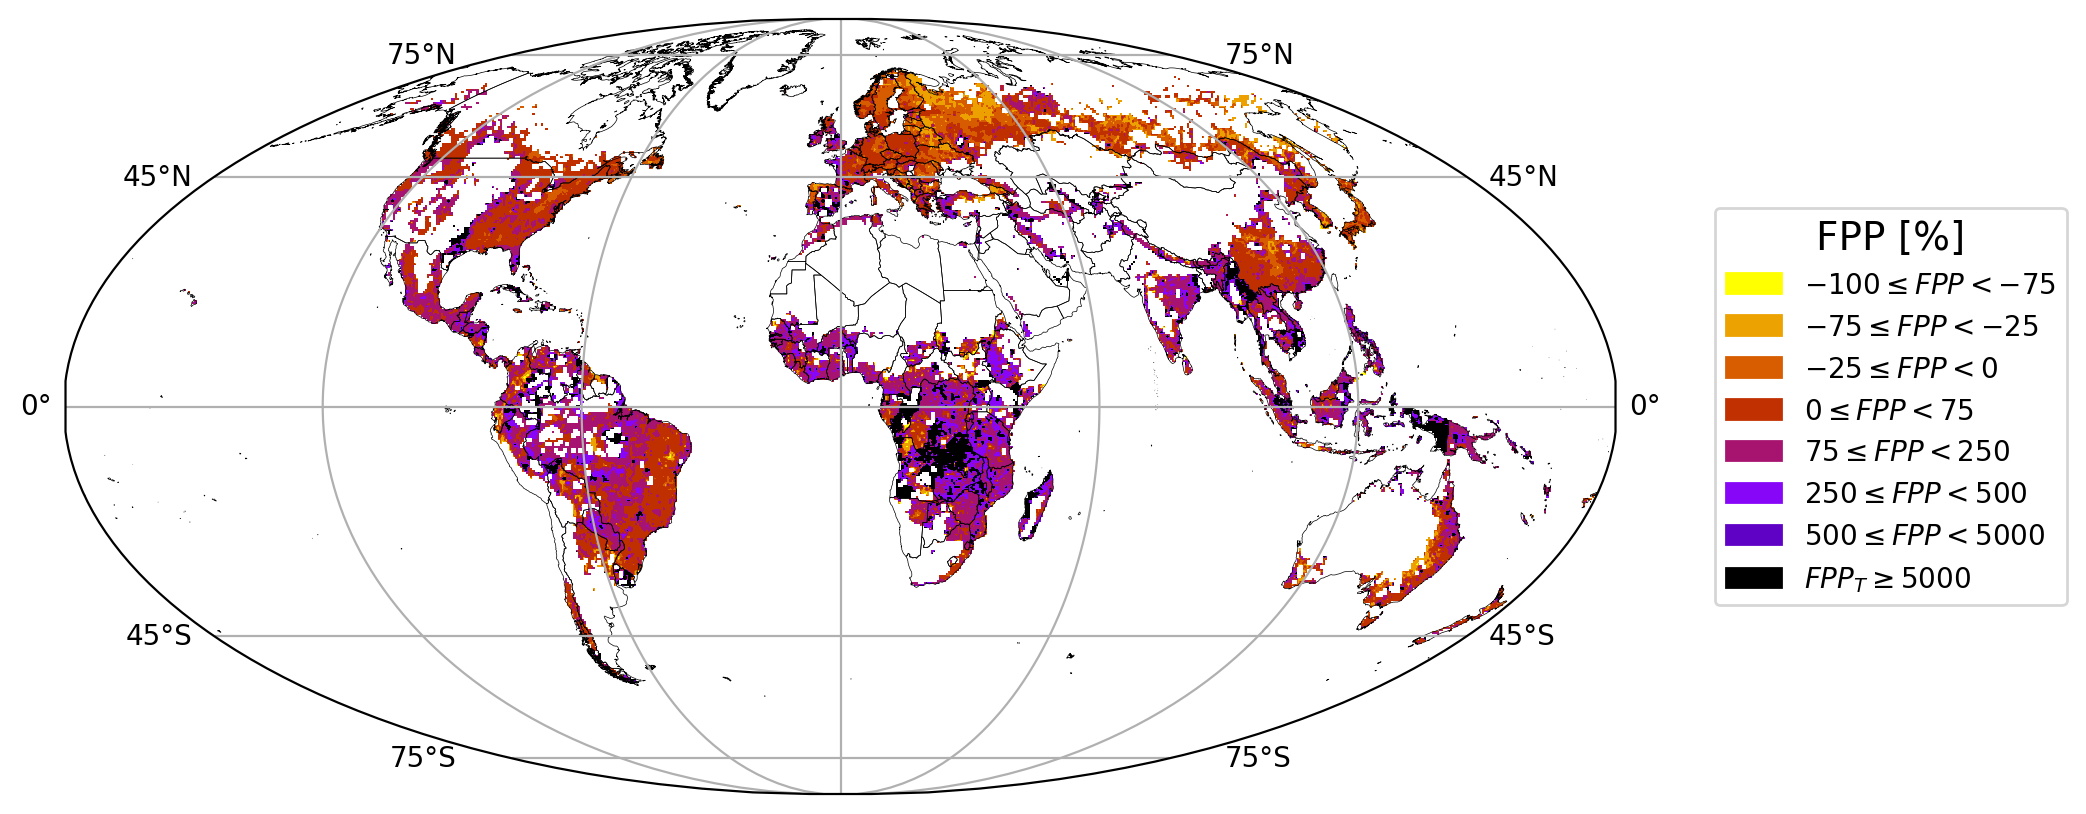

In [104]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
# Plot data
gdf.boundary.plot(ax=ax, color='black', lw=.25)
plot_data_maps(ax, dataRelDiff, cmap, norm, src)
# Create legend patches and add legend
#legend_patches = create_legend_patches(values, colors)
legend_patches = [
    Patch(color=colors[0],  label=rf'${values[0]} \leq FPP < {values[1]}$'),
    Patch(color=colors[1], label=rf'${values[1]} \leq FPP < {values[2]}$'),
    Patch(color=colors[2], label=rf'${values[2]} \leq FPP < {values[3]}$'),
    Patch(color=colors[3], label=rf'${values[3]} \leq FPP < {values[4]}$'),
    Patch(color=colors[4],label=rf'${values[4]} \leq FPP < {values[5]}$'),
    Patch(color=colors[5], label=rf'${values[5]} \leq FPP < {values[6]}$'),
    Patch(color=colors[6], label=rf'${values[6]} \leq FPP < {values[7]}$'),
    Patch(color=colors[7], label=rf'$ FPP_T \geq {values[7]}$')
]
add_legend(ax, legend_patches, 'FPP [%]')

In [105]:
fout = os.path.join(fhn_dir, 'Figures/Figure2B.tiff')
fig.savefig(fout, dpi=300, bbox_inches = 'tight')

# 4. Temporal trend

In [74]:
quantile_values = [0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]

In [83]:
dataTrend = (data - data0) / (2020-1975)
quantiles = np.nanquantile(dataTrend, quantile_values)
# Round the quantiles to the nearest integer
rounded_quantiles = np.round(quantiles).astype(int)
rounded_quantiles

array([-66495,  -1325,    -11,      0,     61,    629,   2473,  15940])

In [84]:
rq = [-1000, -100, 10, 0, 50, 500, 2500, 15000]

In [86]:
cmap = plt.get_cmap('gnuplot_r')  # You can change 'Blues' to any other colormap name

# Generate 9 discrete colors from the colormap
n_colors = len(rq)
colors = [cmap(i / (n_colors - 1)) for i in range(n_colors)]
cmap = ListedColormap(colors)
norm = BoundaryNorm(quantiles, ncolors=len(colors), clip=True)

In [87]:
values =  ['-1k', '-100', '-10', '0', '50', '500', '2500', '15000']

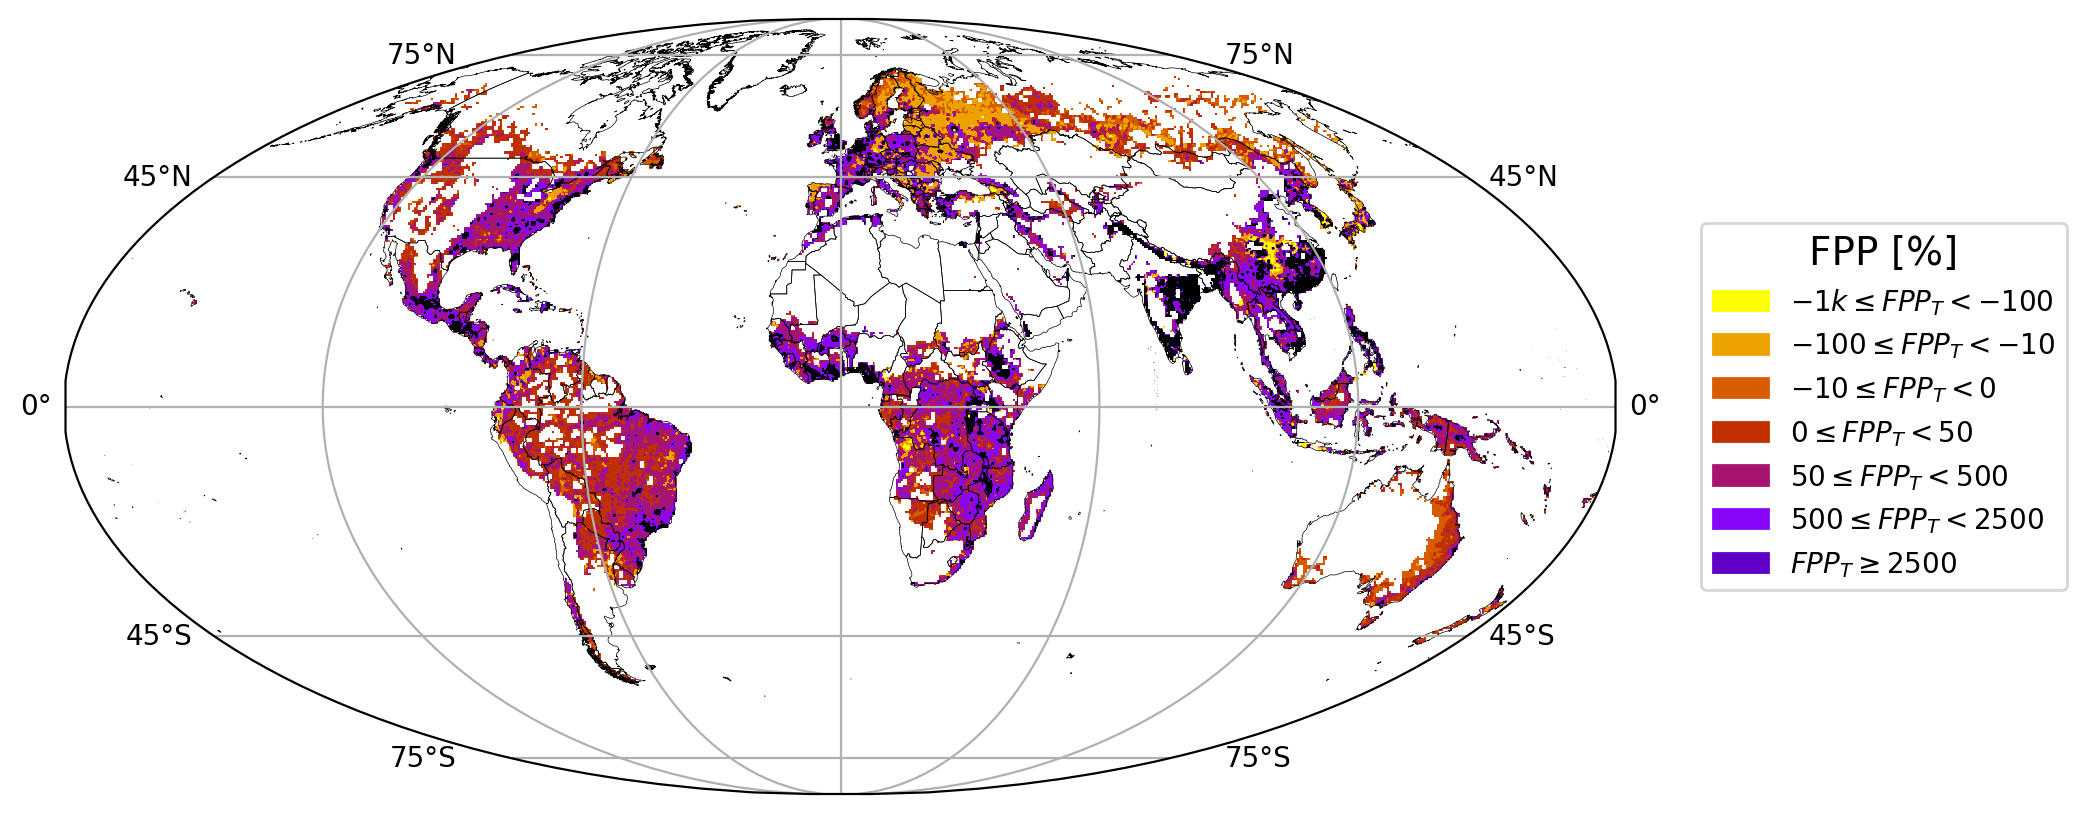

In [88]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
# Plot data
gdf.boundary.plot(ax=ax, color='black', lw=.25)
plot_data_maps(ax, dataTrend, cmap, norm, src)
# Create legend patches and add legend
#legend_patches = create_legend_patches(values, colors)
legend_patches = [
    Patch(color=colors[0],  label=rf'${values[0]} \leq FPP_T < {values[1]}$'),
    Patch(color=colors[1], label=rf'${values[1]} \leq FPP_T < {values[2]}$'),
    Patch(color=colors[2], label=rf'${values[2]} \leq FPP_T < {values[3]}$'),
    Patch(color=colors[3], label=rf'${values[3]} \leq FPP_T < {values[4]}$'),
    Patch(color=colors[4],label=rf'${values[4]} \leq FPP_T < {values[5]}$'),
    Patch(color=colors[5], label=rf'${values[5]} \leq FPP_T < {values[6]}$'),
    Patch(color=colors[6], label=rf'$ FPP_T \geq {values[6]}$')
]
add_legend(ax, legend_patches, 'FPP [%]')